# Course of Machine Learning - Andrew Ng
---
This course from Stanford University taught by Andrew Ng can be found in [Coursera](https://https://www.coursera.org/learn/machine-learning?ranMID=40328&ranEAID=8WD*rW8tVwE&ranSiteID=8WD.rW8tVwE-mVi9SL.HDGWoi_8f6jiXRA&siteID=8WD.rW8tVwE-mVi9SL.HDGWoi_8f6jiXRA&utm_content=10&utm_medium=partners&utm_source=linkshare&utm_campaign=8WD*rW8tVwE)

Originally, these evaluation exercises were written to be executed in Octave or Matlab. Now, I am going to repeat them in Python.

# Python: Exercise 1 - Linear Regression

In this exercise, I will implement linear regression, with one variable and multiple variables, and I will see how it works on data.

## 1 Linear Regresion with one variable 
In this part of the exercise, I will implement linear regression with one variable to predict profits for a food truck. The restaurant franchise is considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

The file *ex1data1.txt* contains the dataset for the linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

### 1.1 Plotting the Data 
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, I will use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population).

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# direct download url to file 'ex1data1.txt'
path = 'https://drive.google.com/uc?id=1PbIOz1lSBFK0KtZbmEQ8pNbUsR418x1m&export=download&authuser=0'

data = pd.read_csv(path, header=None)

# first column is population (variable X)
# second colum is profit (variable y)
data.columns = ['population', 'profit']
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


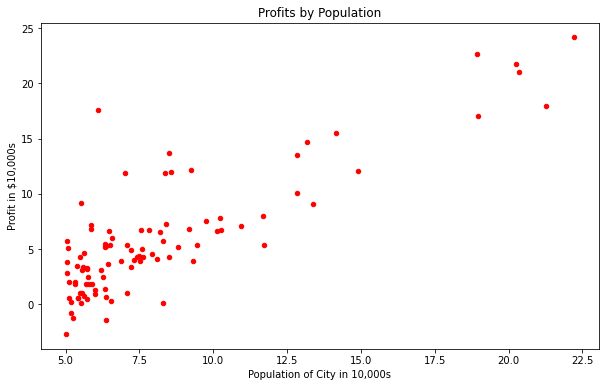

In [3]:
# plot the data in a scatter plot
data.plot(kind='scatter', x='population', y='profit', figsize=(10,6), color='red')

plt.title('Profits by Population')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.show()

### 1.2 Gradient Descent 
In this part, I will fit the linear regression parameters $\theta$ to our dataset using gradinet descent. 

#### *Equations*

The objetive of linear regression is to minimizxe the cost function, J($\theta$), where the hypothesis $h_{\theta}(x)$ is given by the linear model. 

$ J(\theta) = \dfrac{1}{2m} * \sum\limits _{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)} )^2 $

$ h_{\theta}(x^{(i)}) = \theta^T x  = \theta_0 + \theta_1x_1$

The parameters of the model are the $\theta_j$ values. These are the values I will adjust to minimize cost J($\theta$) using the bath gradient descent algorith. In bacth gradient descent, each iteration performs the update simultaneaously for all $\theta_j$:

$ \theta_j := \theta_j - \alpha\dfrac{1}{m} \sum\limits _{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)} )x_j^{(i)} $

With each step of gradient descent, the parameters $\theta_j$ come closer to the optimal values that will achive the lowest cost J($\theta$).

#### *Implementation*
To take into account the intercept term ($\theta_0$), I will add an additional first column to X and set it to all ones. 

In [4]:
# Set the variables
m = len(data)

X = data['population'].to_numpy()
X = np.stack([np.ones(m), X], axis=1)
y = data['profit'].to_numpy().reshape((m, 1))

#### *Computing the Cost Function*
I will  implement tthe function *computeCost(X, y, theta)* to calculate J($\theta$) in order to check the convergence of the gradient descent implementation.

In [5]:
def computeCost(X, y, theta):
  # COMPUTECOST(X, y, theta) computes the cost of using theta as the parameter 
  # for linear regression to fit the data points in X and y
  
  # Initialize some values
  m = len(y);     # number of training examples
  J = 0;          # cost

  # compute cost
  h = np.dot(X, theta)
  J = (1/(2*m)) * np.sum(np.square(h - y))

  return J

In [6]:
# Initial parameters
theta = np.zeros((2,1))

J = computeCost(X, y, theta)
print('With theta = [0 ; 0] \nCost computed = ' + str(round(J, 4)))
print('Expected cost value (approx): 32.07\n')

J = computeCost(X, y, [[-1] , [2]]);
print('\nWith theta = [-1 ; 2] \nCost computed = ' + str(round(J, 4)));
print('Expected cost value (approx) 54.24\n');

With theta = [0 ; 0] 
Cost computed = 32.0727
Expected cost value (approx): 32.07


With theta = [-1 ; 2] 
Cost computed = 54.2425
Expected cost value (approx) 54.24



#### *Implementing Gradient Descent*
I will implement the gradient descent in the function *gradientDescent(X, y, theta, alpha, iterations)*. There, using a loop structure, the values of $\theta$ are updated and the value of J($\theta$) is saved in each iteration.

I will initialize the parameters of $\theta$ to 0, the learning rate alpha to 0.01, and the total iterations to 1500.

In [7]:
def gradientDescent(X, y, theta, alpha, iterations):
  # GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by taking 
  # num_iters gradient steps with learning rate alpha

  # Initialize some useful values
  m = len(y)                               # number of training examples
  J_history = np.zeros((iterations, 1))   # cost over the iterations

  # Make a copy of theta, which will be updated by gradient descent
  theta = theta.copy()

  for i in range(iterations):
    # Perform a single gradient step on the parameter vector theta. 
    h = np.dot(X, theta)

    t0 = theta[0] - ( alpha * (1/m) * np.sum(h - y) )
    t1 = theta[1] - ( alpha * (1/m) * np.sum(np.dot( X[:,1].T , (h - y) ) ) )

    theta[0] = t0
    theta[1] = t1

    # Save the cost J in every iteration    
    J_history[i,:] = computeCost(X, y, theta)

  return theta, J_history

In [8]:
# Initial parameters
theta = np.zeros((2,1))
alpha = 0.01
iterations = 1500

# Calculate Gradient Descent
[theta, J_history] = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:')
print(np.round(theta, 4))
print('Expected theta values (approx):')
print('-3.6303\n 1.1664')

Theta found by gradient descent:
[[-3.6303]
 [ 1.1664]]
Expected theta values (approx):
-3.6303
 1.1664


#### *Visualizing the linear fit*



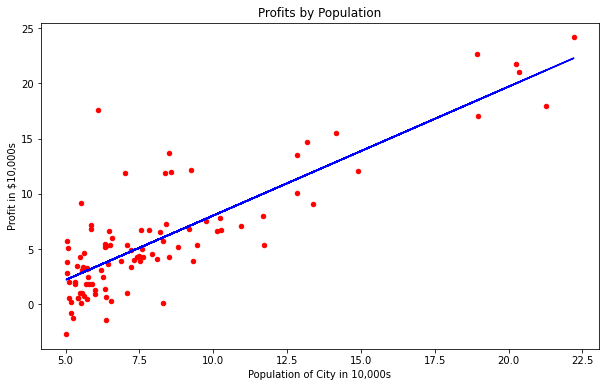

In [9]:
# Plot the data in a scatter plot
data.plot(kind='scatter', x='population', y='profit', figsize=(10,6), color='red')

plt.title('Profits by Population')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# Plot the linear fit over the scatter plot
h = np.dot(X, theta)
plt.plot(X[:,1], h, color='blue')

plt.show()

#### *Predicting values*

The final values for $\theta$will be used to make predictions on profits in areas of 35,000 and 70,000 people.

In [10]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5] , theta) * 10000
print('For population = 35,000, we predict a profit of ' + str(round(float(predict1), 4)))
predict2 = np.dot([1, 7] , theta) * 10000
print('For population = 70,000, we predict a profit of ' + str(round(float(predict2), 4)))

For population = 35,000, we predict a profit of 4519.7679
For population = 70,000, we predict a profit of 45342.4501


### 1.3 Visualizing Cost Function

To understand the **cost function J($\theta$)** better, I will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. I will produce a surface plot and a contour plot of J($\theta$)

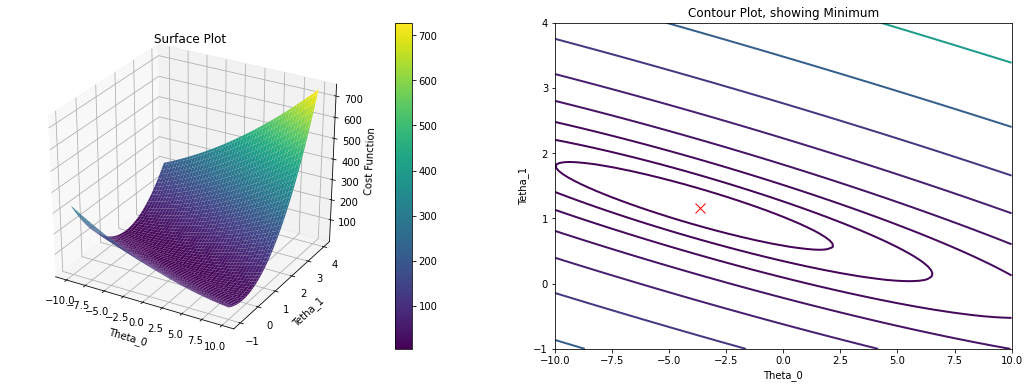

In [11]:
### 2D Grid of Theta values ###
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)

Theta0_vals, Theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(Theta0_vals), len(Theta1_vals)))
t = np.zeros((2,1))

# Fill out J_vals
for i in range(len(theta0_vals)):
  for j in range(len(theta1_vals)):
    t[0,0] = theta0_vals[i]
    t[1,0] = theta1_vals[j]
    J_vals[i,j] = computeCost(X, y, t)

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T


### Surface plot ###
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
surf = ax1.plot_surface(Theta0_vals, Theta1_vals, J_vals, cmap='viridis')
fig.colorbar(surf, ax=ax1)
ax1.set_title('Surface Plot')
ax1.set_xlabel('Theta_0')
ax1.set_ylabel('Tetha_1')
ax1.set_zlabel('Cost Function')


### Contour plot ###
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax2 = fig.add_subplot(1,2,2)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
ax2.set_title('Contour Plot, showing Minimum')
ax2.set_xlabel('Theta_0')
ax2.set_ylabel('Tetha_1')

#ax2.plot(theta[0,0], theta[1,0], color='red', marker='x', linewidth=2, markersize=10)
plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2)

plt.show()


## 2 Linear Regression with Multiple Variables

In this part, I will implement linear **regression with multiple variables** to predict the prices of houses. 

Supossing I am going to sell my house and I want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

### 2.0 Understanding Data

The file *ex1data2.txt* contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.


In [12]:
# direct download url to file 'ex1data1.txt'
path = 'https://drive.google.com/uc?id=1lIWYxiadB7v8Hue2hc9kKljez7gk6A_V&export=download&authuser=0'

data_multi = pd.read_csv(path, header=None)

# first column is population (variable X)
# second colum is profit (variable y)
data_multi.columns = ['size', 'bedrooms', 'price']
data_multi.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 2.1 Feature Normalization

By looking at the values, house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, it is better to first perform feature scaling in order to make gradient descent converge much more quickly.



In [13]:
def featureNormalize(X):
  # FEATURENORMALIZE Normalizes the features in X. 
  # It returns a normalized version of X where the mean value of 
  # each feature is 0 and the standard deviation is 1. 

  # Initilize the values
  X_norm = X;
  num_features = X.shape[1]
  mu = np.zeros((1, num_features))
  sigma = np.zeros((1, num_features))

  # Compute the mean of each feature storing it in mu
  mu = np.mean(X)

  # Compute the standard deviation of each feature storing it in sigma. 
  sigma = np.std(X)

  # calculate the mean normalization
  X_norm = (X - mu)/sigma

  return X_norm, mu, sigma

In [14]:
# Set the variables
m_multi = len(data_multi)

X_multi = data_multi.iloc[:,0:2].to_numpy()
y_multi = data_multi.iloc[:,2].to_numpy().reshape((m_multi, 1))

# Normalize X
X_multi, mu, sigma = featureNormalize(X_multi)

# Add the intercept term to X
X_multi = np.concatenate([np.ones((m_multi, 1)), X_multi], axis=1)

### 2.2 Gradient Descent
In this second part, I will fit the linear regression parameters $\theta$ to our dataset using gradient descent. In this case, there are mor than one features to be taken into account.

#### *Equations*

The objetive of linear regression is to minimizxe the cost function, J($\theta$), where the hypothesis $h_{\theta}(x)$ is given by the linear model. 

$ J(\theta) = \dfrac{1}{2m} * \sum\limits _{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)} )^2 $

$ h_{\theta}(x^{(i)}) = \theta^T x  = \theta_0 + \theta_1x_1$

The parameters of the model are the $\theta_j$ values. These are the values I will adjust to minimize cost J($\theta$) using the bath gradient descent algorith. In bacth gradient descent, each iteration performs the update simultaneaously for all $\theta_j$:

$ \theta_j := \theta_j - \alpha\dfrac{1}{m} \sum\limits _{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)} )x_j^{(i)} $

With each step of gradient descent, the parameters $\theta_j$ come closer to the optimal values that will achive the lowest cost J($\theta$).

#### *Computing the Cost Function*

In [15]:
def computeCostMulti(X, y, theta):
  # COMPUTECOSTMULTI(X, y, theta) compute cost for linear regression with 
  # multiple variables
  # It computes the cost of using theta as the parameter for linear regression 
  # to fit the data points in X and y
  
  # Initialize some values
  m = len(y);     # number of training examples
  J = 0;          # cost

  # compute cost
  h = np.dot(X, theta)
  J = (1/(2*m)) * np.sum(np.square(h - y))

  return J

#### *Implementing Gradient Descent*

In [16]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
  # GRADIENTDESCENTMULTI(X, y, theta, alpha, num_iters) Performs gradient 
  # descent to learn theta. 
  # It updates theta by taking num_iters gradient steps with learning rate alpha

  # Initialize some useful values
  m = len(y)                                      # number of training examples
  features = X.shape[1]                           # number of features
  J_history = np.zeros((iterations, 1))           # cost over the iterations

  # Make a copy of theta, which will be updated by gradient descent
  theta = theta.copy()

  for i in range(iterations):
    # Perform a single gradient step on the parameter vector theta. 
    h = np.dot(X, theta)
    t = theta

    for j in range(features):
        t[j,:] = theta[j,:] - ( alpha * (1/m) * np.sum(np.dot( X[:,j].T , (h - y) ) ) )

    theta = t

    # Save the cost J in every iteration    
    J_history[i,:] = computeCostMulti(X, y, theta)

  return theta, J_history

In [17]:
# Choose some alpha value
alpha_multi = 0.01
num_iters_multi = 400

# Initialize Theta and Run Gradient Descent 
theta_multi = np.zeros((3, 1))
theta_multi, J_history_multi = gradientDescentMulti(X_multi, y_multi, theta_multi, alpha_multi, num_iters_multi)

# Display gradient descent's result
print('Theta computed from Gradient Descent: \n' + str(np.round(theta_multi, 4)))
print('Cost Function after Gradient Descent: \n' + str(J_history_multi[-1,:]))

Theta computed from Gradient Descent: 
[[ 119999.4136]
 [ 148539.6856]
 [-104839.1981]]
Cost Function after Gradient Descent: 
[2.06491168e+09]


#### Selecting Learning Rates and plotting the convergence of Gradient Descent

I will implement the gradient descent trying diferent values of the learning rate $\alpha$ (0.3, 0.1, 0.03, 0.01, 0.003, 0.001). In order to evaluate the differences between every learning rate, I will plot the cost function over a number of iterations. 



In [36]:
# Initialize Parameters t 
theta_lr_0 = np.zeros((3, 1))
num_iters_lr = 100
alpha_1 = 0.3
alpha_2 = 0.1
alpha_3 = 0.03
alpha_4 = 0.01
alpha_5 = 0.003
alpha_6 = 0.001

# Run Gradient Descent with each learning rate
theta_lr_1, J_learning_rate_1 = gradientDescentMulti(X_multi, y_multi, theta_lr_0, alpha_1, num_iters_lr)
theta_lr_2, J_learning_rate_2 = gradientDescentMulti(X_multi, y_multi, theta_lr_0, alpha_2, num_iters_lr)
theta_lr_3, J_learning_rate_3 = gradientDescentMulti(X_multi, y_multi, theta_lr_0, alpha_3, num_iters_lr)
theta_lr_4, J_learning_rate_4 = gradientDescentMulti(X_multi, y_multi, theta_lr_0, alpha_4, num_iters_lr)
theta_lr_5, J_learning_rate_5 = gradientDescentMulti(X_multi, y_multi, theta_lr_0, alpha_5, num_iters_lr)
theta_lr_6, J_learning_rate_6 = gradientDescentMulti(X_multi, y_multi, theta_lr_0, alpha_6, num_iters_lr)

print('For alpha = ' + str(alpha_1) + ', the theta computed after Gradient Descent:')
print(np.round(theta_lr_1, 4))
print('\nFor alpha = ' + str(alpha_2) + ', the theta computed after Gradient Descent:')
print(np.round(theta_lr_2, 4))
print('\nFor alpha = ' + str(alpha_3) + ', the theta computed after Gradient Descent:')
print(np.round(theta_lr_3, 4))
print('\nFor alpha = ' + str(alpha_4) + ', the theta computed after Gradient Descent:')
print(np.round(theta_lr_4, 4))
print('\nFor alpha = ' + str(alpha_5) + ', the theta computed after Gradient Descent:')
print(np.round(theta_lr_5, 4))
print('\nFor alpha = ' + str(alpha_6) + ', the theta computed after Gradient Descent:')
print(np.round(theta_lr_6, 4))

For alpha = 0.3, the theta computed after Gradient Descent:
[[ 116792.6256]
 [ 153820.521 ]
 [-102109.4304]]

For alpha = 0.1, the theta computed after Gradient Descent:
[[ 117291.2696]
 [ 153039.091 ]
 [-102486.9052]]

For alpha = 0.03, the theta computed after Gradient Descent:
[[ 121118.4344]
 [ 146608.6575]
 [-105815.5721]]

For alpha = 0.01, the theta computed after Gradient Descent:
[[ 116526.4471]
 [ 131539.5751]
 [-101803.315 ]]

For alpha = 0.003, the theta computed after Gradient Descent:
[[ 69996.4267]
 [ 76871.1201]
 [-61152.6337]]

For alpha = 0.001, the theta computed after Gradient Descent:
[[ 29846.0461]
 [ 32556.8202]
 [-26075.1432]]


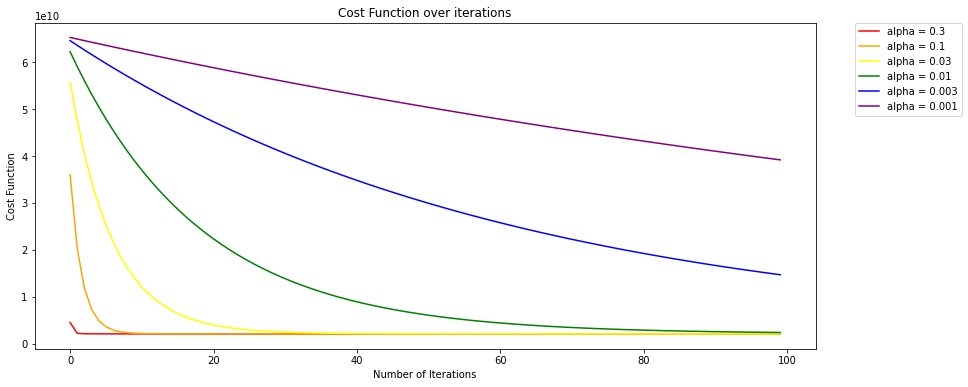

In [35]:
# Plot the different convergences 
fig = plt.figure(figsize=(14,6))
plt.plot(range(num_iters_lr), J_learning_rate_1, color='red', label="alpha = 0.3")
plt.plot(range(num_iters_lr), J_learning_rate_2, color='orange', label="alpha = 0.1")
plt.plot(range(num_iters_lr), J_learning_rate_3, color='yellow', label="alpha = 0.03")
plt.plot(range(num_iters_lr), J_learning_rate_4, color='green', label="alpha = 0.01")
plt.plot(range(num_iters_lr), J_learning_rate_5, color='blue', label="alpha = 0.003")
plt.plot(range(num_iters_lr), J_learning_rate_6, color='purple', label="alpha = 0.001")

plt.title('Cost Function over iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')

# Place a legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Observing the behaviours of the convergences based on the diferent learning rates, it seems that the ones who converge faster are when alpha is between 0.3 and 0.03.

#### *Predicting values*

The final values for $\theta$will be used to estimate the price of a 1650 square-feet and 3 bedrooms house.

In [37]:
# Normalize the example to predict
house = np.array([[1650, 3]])
house_norm = (house - mu)/sigma
house_norm = np.concatenate([np.ones((1, 1)), house_norm], axis=1)
house_norm.shape

# Estimate the price using alpha = 0.3
predict = np.dot(house_norm, theta_lr_1)
print('For a 1650 square-feet and 3 bedrooms house, we predict a price of $' + str(round(float(predict))))

For a 1650 square-feet and 3 bedrooms house, we predict a price of $293238


### 2.3 Normal Equation

The closed-form solution to linear
regression is the following: 

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, but it is still
needed to add a column of 1's to the X matrix in order to have an intercept term ($\theta_0$). I will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.

In [20]:
# Loading Data
path = 'https://drive.google.com/uc?id=1lIWYxiadB7v8Hue2hc9kKljez7gk6A_V&export=download&authuser=0'

data_ne = pd.read_csv(path, header=None)

In [21]:
# Set the variables
m_ne = len(data_ne)

X_ne = data_ne.iloc[:,0:2].to_numpy()
y_ne = data_ne.iloc[:,2].to_numpy().reshape((m_ne, 1))

# Add the intercept term to X
X_ne = np.concatenate([np.ones((m_ne, 1)), X_ne], axis=1)

#### *Implementing Normal Equation*

In [22]:
def normalEqn(X, y):
  # NORMALEQN(X,y) computes the closed-form solution to linear 
  # regression using the normal equations.

  # Initialize parameter theta
  theta = np.zeros((X.shape[1], 1))

  # Normal equation
  theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y) 

  return theta

In [23]:
# Calculate the parameters from the normal equation
theta_ne = normalEqn(X_ne, y_ne)

# Display normal equation's result
print('Theta computed from the normal equations: ')
print(np.round(theta_ne, 4))

Theta computed from the normal equations: 
[[89597.9095]
 [  139.2107]
 [-8738.0191]]


#### *Predicting values*

The final values for $\theta$will be used to estimate the price of a 1650 square-feet and 3 bedrooms house.

In [24]:
# Initialize the example to predict
house_ne = np.array([[1, 1650, 3]])

# Estimate the price
predict_ne = np.dot(house_ne, theta_ne)
print('For a 1650 square-feet and 3 bedrooms house, we predict a price of $' + str(round(float(predict_ne))))

For a 1650 square-feet and 3 bedrooms house, we predict a price of $293081


### 2.4 Linear Regression vs Normal Equation

Both prediction using Linear Regresion with Multiple Variables and using the Normal Equation have similar results:

|                                     |         House         |  Price |
|:-----------------------------------:|:---------------------:|:------:|
| Linear Regression Multiple Variable | 1650 sq-ft 3 bedrooms | 293238 |
| Normal Equation                     | 1650 sq-ft 3 bedrooms | 293081 |